In [ ]:
# INSTALLED VERSION FROM A REPLY OF: https://stackoverflow.com/questions/79515458/gensim-on-google-colab-modulenotfounderror-no-module-named-numpy-strings
!pip3 install gensim==4.3
!pip3 install numpy==1.26
!pip3 install scipy==1.13.1
# AFTER THOSE INSTALL "Restart Session" on Colab, IGNORE the "errors" this cell might have (clear its output)
# After restarting the Colab session, just run next cell without this one ...

# BOTH TIMES IT ASKS YOU TO REFRESH SESSION YOU HAVE TO REFRESH IT RIGHT THEN OR THERES LIBRARY INCOMPATIBILITIES! DON'T WAIT! WHEN IT PROMPTS FOR SESSION RESTART, DO IT!

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 801.6 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.3/60.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 36.7 MB/s eta 0:00:00
  Created wheel for fst-pso: filename=fst_pso-1.8.1-py3-none-any.whl size=20431 sha256=f32c2dfdc4e44e3ce2cef81aa7d32b625029fa3a5fd4cbaf6edf8dcbe15dd7d9
  Stored in directory: /root/.cache/pip/wheels/69/f5/e5/18ad53fe1ed6b2af9fad05ec052e4acbac8e92441df44bad2e
  Created wheel for miniful: filename=miniful-0.0.6-py3-none-any.whl size=3506 sha256=748ee4f041715d47413a8ba6f560049de48b026048ed250415dd161a1d369b3f
  Stored in directory: /root/.ca

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 87.1 MB/s eta 0:00:00
^C
^C


In [ ]:
# STOPPED AFTER THE ABOVE CELL LAST OUTPUTTED THIS EXACTLY AND THE REST OF THE CODE FUNTIONS!
# (this was stopped by "Restarting Session" when Colab prompted for a restart, after it installed most of the libraries outputted above ...)

# Successfully installed numpy-1.26.0
# Collecting scipy==1.13.1
#   Downloading scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
#      ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.8 MB/s eta 0:00:00
# Requirement already satisfied: numpy<2.3,>=1.22.4 in /usr/local/lib/python3.11/dist-packages (from scipy==1.13.1) (1.26.0)
# Downloading scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
#    ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 16.6 MB/s eta 0:00:00
# ERROR: Operation cancelled by user
# ^C

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
# install StellarGraph as mentioned at: https://stackoverflow.com/questions/77289371/error-no-matching-distribution-found-for-stellargraphdemos-1-2-1
!pip install tensorflow==2.12.0
!pip install git+https://github.com/VenkateshwaranB/stellargraph.git

import networkx as nx
from stellargraph import StellarGraph

import pandas as pd
targets = pd.read_csv('/content/drive/MyDrive/Citation_dataframes/NetworkX_Edgelists/targets_0.csv')

G = nx.read_gexf('/content/drive/MyDrive/Citation_dataframes/NetworkX_Edgelists/graph_0.csv')

# extracting target values ...
y = [G.nodes[n]['status'] for n in G.nodes()]

G = StellarGraph.from_networkx(G)

Mounted at /content/drive
  Cloning https://github.com/VenkateshwaranB/stellargraph.git to /tmp/pip-req-build-k4zg4tps
  Running command git clone --filter=blob:none --quiet https://github.com/VenkateshwaranB/stellargraph.git /tmp/pip-req-build-k4zg4tps
  Resolved https://github.com/VenkateshwaranB/stellargraph.git to commit efa1f847109a4ba490e7a5105646a20ee09a3243
  Preparing metadata (setup.py) ... done


In [ ]:
# EVERYTHING THAT FOLLOWS WAS MAINLY BASED ON:
# https://stellargraph.readthedocs.io/en/stable/demos/node-classification/node2vec-weighted-node-classification.html

# ALSO ON
# https://github.com/stellargraph/stellargraph/blob/develop/demos/embeddings/node2vec-embeddings.ipynb
# ALSO AVAILABLE AT:
# https://stellargraph.readthedocs.io/en/latest/demos/embeddings/node2vec-embeddings.html

In [ ]:
import sys
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import os
import networkx as nx
import numpy as np
import pandas as pd
from stellargraph import datasets
from IPython.display import display, HTML

%matplotlib inline

In [ ]:
# dataset = datasets.Cora()
# display(HTML(dataset.description))
# G, node_subjects = dataset.load(largest_connected_component_only=True)

from stellargraph.data import BiasedRandomWalk
rw = BiasedRandomWalk(G)
walks = rw.run(
    nodes=list(G.nodes()),  # root nodes
    length=100,  # maximum length of a random walk
    n=10,  # number of random walks per root node
    p=0.5,  # Defines (unormalised) probability, 1/p, of returning to source node
    q=2.0,  # Defines (unormalised) probability, 1/q, for moving away from source node
)
print("Number of random walks: {}".format(len(walks)))

Number of random walks: 13190


In [ ]:
from gensim.models import Word2Vec
str_walks = [[str(n) for n in walk] for walk in walks]
model = Word2Vec( str_walks, vector_size=128, window=5, min_count=0, sg=1, workers=2, epochs=1 )

In [ ]:
# Retrieve node embeddings and corresponding subjects
node_ids = model.wv.index_to_key  # list of node IDs
node_embeddings = ( model.wv.vectors )  # numpy.ndarray of size number of nodes times embeddings dimensionality
# node_targets = node_subjects.loc[[int(node_id) for node_id in node_ids]]
X = node_embeddings

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.5, test_size=None, random_state=42 # should be 0.5 instead of 0.75 (or less than 0.5)
)

In [ ]:
X_train[0]

array([ 0.4904376 , -0.3102217 , -0.207963  ,  0.07504038,  0.22206491,
        0.16737929, -0.42898706, -0.28067848,  0.07786746, -0.07938596,
       -0.0283785 , -0.39448366, -0.38308796,  0.28486112,  0.8098991 ,
        0.7697448 ,  0.0020276 , -0.5580282 ,  0.25126436,  0.01882494,
       -0.41594926,  0.35751292, -0.6228658 , -0.21343388, -0.2639726 ,
        0.16695271, -0.71308243,  0.15720138, -0.30786765,  0.6236477 ,
        0.39020002, -0.01986874,  0.02737134,  0.7340878 ,  0.36986947,
        0.0216449 ,  0.23829924,  0.22709574,  0.08957689,  0.30898458,
       -0.6011924 ,  0.08386298, -0.06150156, -0.6217005 ,  0.4599089 ,
       -0.5209239 , -0.641647  ,  0.2261671 ,  0.05170895, -0.28484082,
        0.8716015 , -0.12554196,  0.43590865,  0.40193802,  0.17564085,
        0.24437135,  0.27210242, -0.4974111 , -0.00861687,  0.13154319,
       -0.41443154,  0.15551692,  0.20824346, -0.55168915,  0.10182033,
       -0.23284762, -0.09327272, -0.281678  , -0.0673026 , -0.42

In [ ]:
print(X_train.shape)
print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)

(153, 128)
(52, 128)


In [ ]:
X_train

array([[ 0.07784238, -0.45597738,  0.20511682, ..., -0.02724814,
         0.26383394, -0.2314861 ],
       [-0.00309346, -0.00190185, -0.00490627, ..., -0.00742792,
        -0.0013542 , -0.00672973],
       [ 0.03978857, -0.46683136,  0.03140074, ...,  0.02019248,
         0.24823084, -0.10988352],
       ...,
       [ 0.02570449, -0.42147663,  0.17394404, ..., -0.1047969 ,
         0.44698155, -0.24083814],
       [-0.00246313, -0.00704529,  0.00328646, ..., -0.00462305,
        -0.00062323,  0.00626655],
       [-0.00679471, -0.61555094,  0.12156288, ..., -0.00518156,
         0.47676528, -0.1407034 ]], dtype=float32)

In [ ]:
X_train[0]

array([ 0.07784238, -0.45597738,  0.20511682,  0.43917203, -0.09987261,
       -0.35676247,  0.4191547 ,  0.00254377, -0.19684495,  0.483937  ,
        0.9735163 ,  0.20489699, -0.12180717, -0.16631714, -0.35651866,
        0.04484777, -0.2631658 , -0.3140844 , -0.03379717,  0.715497  ,
        0.37695104,  0.2712782 , -0.49719915,  0.02734672, -0.8886255 ,
        0.182181  , -0.10164313, -0.11564277,  0.4533373 , -0.11598265,
        0.6210595 ,  0.8089958 ,  0.10560901,  0.31196278,  0.530953  ,
       -0.73534036,  0.7111482 ,  0.0704466 , -0.19451761, -0.19065636,
       -0.03996678,  0.34651375, -0.46554628,  0.11446669,  0.13805337,
        0.35978666, -0.43071055,  0.00600338, -0.31057936,  0.36286595,
        0.21564874,  0.21186216, -0.15233736,  0.03595717,  0.5205442 ,
        0.08777802,  0.1837832 , -0.4798462 , -0.6174917 ,  0.02054664,
       -0.49479148,  0.49991685,  0.4770385 ,  0.46984422,  0.30458114,
       -0.22025856, -0.17158732,  0.07731016,  0.30322883, -0.04

In [ ]:
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import pairwise_distances
from sklearn import preprocessing

import numpy as np

from stellargraph.data import BiasedRandomWalk
from stellargraph import StellarGraph

from gensim.models import Word2Vec

import seaborn as sns
import warnings
import collections
from stellargraph import datasets
from IPython.display import display, HTML
import matplotlib.pyplot as plt

%matplotlib inline

FixedThresholdClassifier Accuracy (test set):  0.5113636363636364
TunedThresholdClassifierCV Accuracy (test set):  0.5909090909090909
KNeighborsClassifier Accuracy (test set):  0.5075757575757576
RadiusNeighborsClassifier Accuracy (test set):  0.48484848484848486


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

NearestCentroid Accuracy (test set):  0.5833333333333334
SGDClassifier Accuracy (test set):  0.5265151515151515
RidgeClassifierCV Accuracy (test set):  0.5416666666666666
RidgeClassifier Accuracy (test set):  0.6325757575757576
Perceptron Accuracy (test set):  0.5189393939393939
PassiveAggressiveClassifier Accuracy (test set):  0.5227272727272727
SVC Accuracy (test set):  0.5681818181818182
LinearSVC Accuracy (test set):  0.6060606060606061
RandomForestClassifier Accuracy (test set):  0.5795454545454546
AdaBoostClassifier Accuracy (test set):  0.5492424242424242
BaggingClassifier Accuracy (test set):  0.5151515151515151
ExtraTreesClassifier Accuracy (test set):  0.5643939393939394
GradientBoostingClassifier Accuracy (test set):  0.5795454545454546
HistGradientBoostingClassifier Accuracy (test set):  0.5606060606060606


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier Accuracy (test set):  0.5265151515151515


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

DecisionTreeClassifier Accuracy (test set):  0.5454545454545454
ExtraTreeClassifier Accuracy (test set):  0.5075757575757576


<ipython-input-33-9a50a9ae7410>:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize = (5,3))


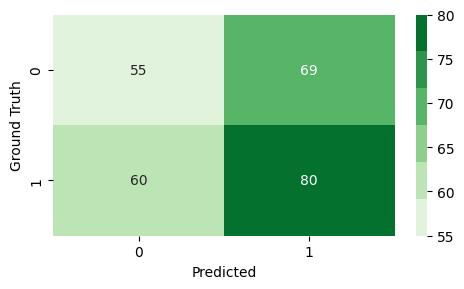

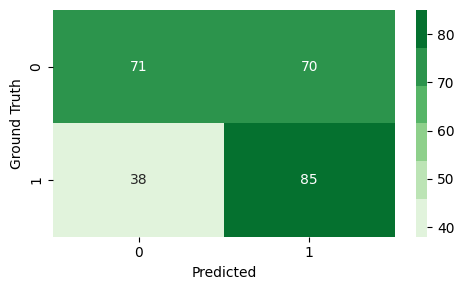

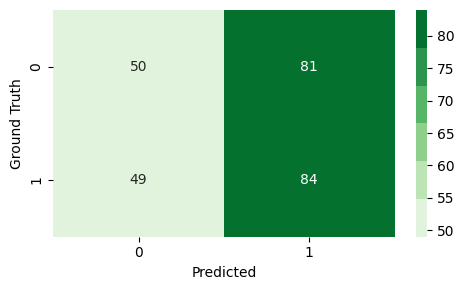

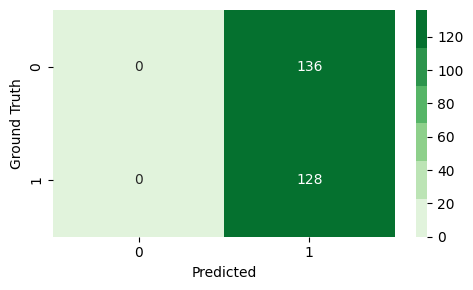

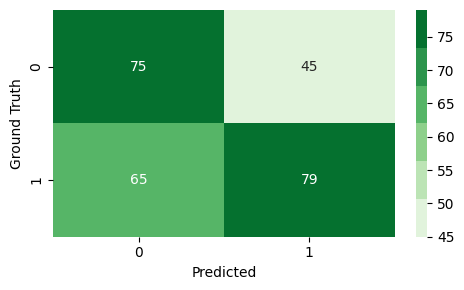

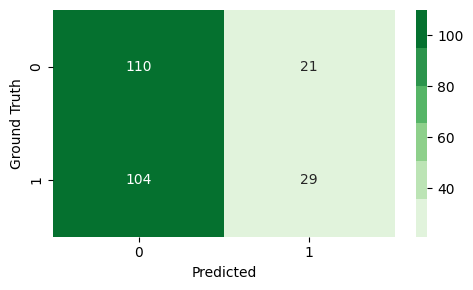

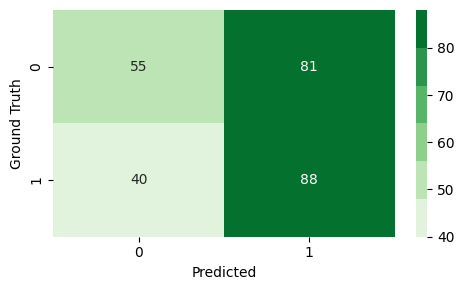

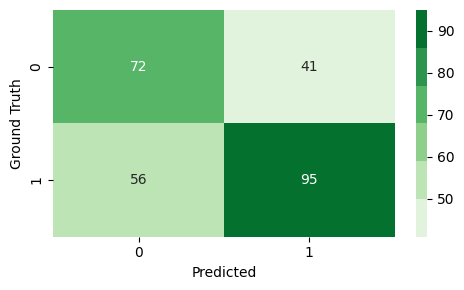

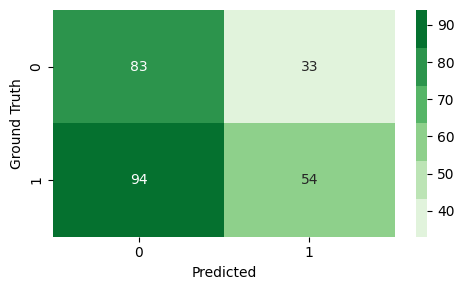

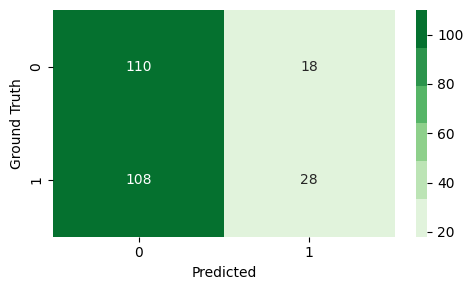

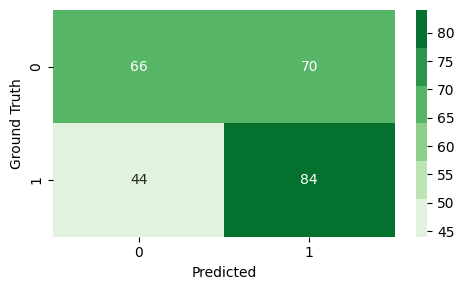

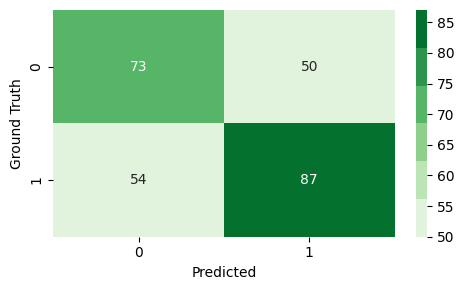

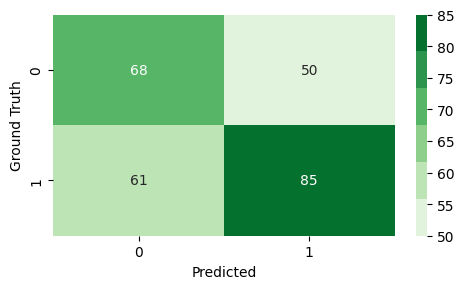

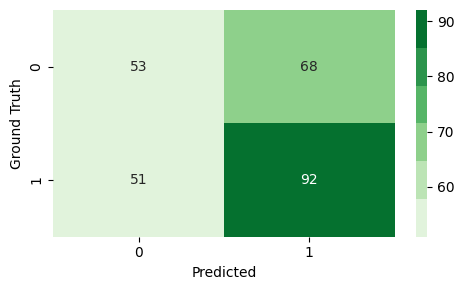

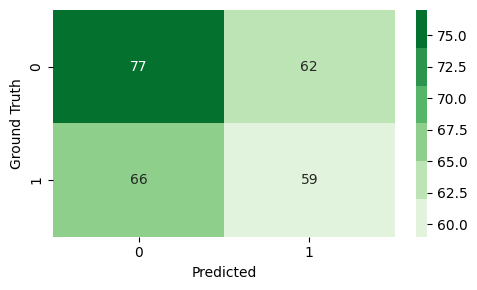

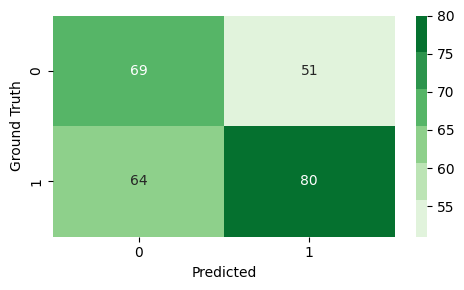

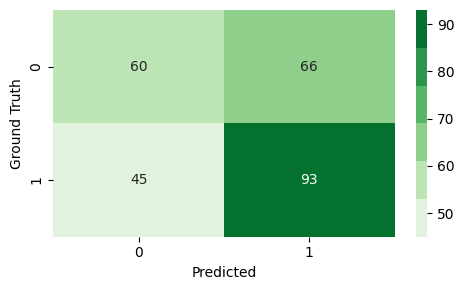

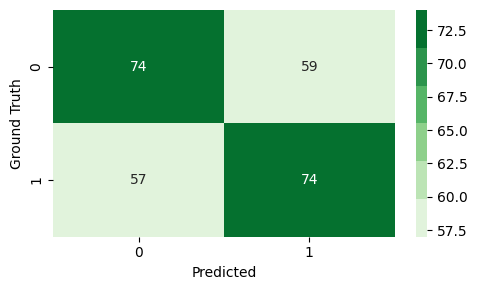

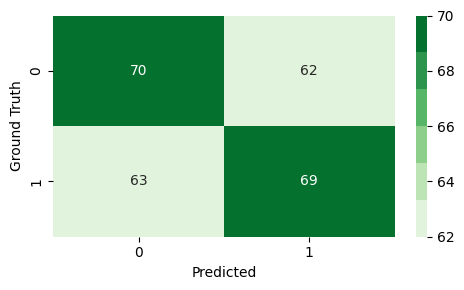

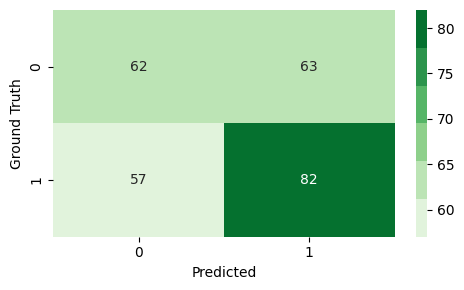

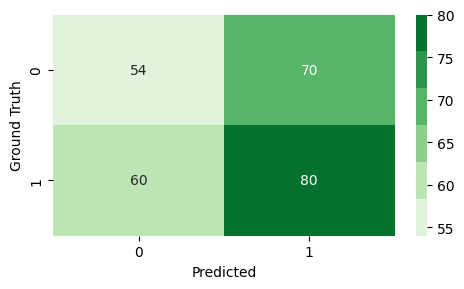

In [ ]:
def calculate_mda(y_test, y_predict): # Mean Directional Accuracy (MDA)
    import tensorflow as tf
    y_test = np.array(y_test).astype('int32')
    y = tf.constant(y_test)
    y_predict = y_predict.astype('int32')
    y_hat = tf.constant(y_predict)
    return np.array(tf.reduce_mean(tf.cast(tf.equal(tf.sign(y[1:] - y[:-1]), tf.sign(y_hat[1:] - y_hat[:-1])), tf.float32))).item(0)

import os
directory="/content/drive/MyDrive/GNN_Plots_2/"
if not os.path.exists(directory):
    os.makedirs(directory)

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error, root_mean_squared_log_error, root_mean_squared_error, mean_absolute_percentage_error, explained_variance_score, median_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import random
from sklearn.metrics import precision_score, recall_score, f1_score, fbeta_score, classification_report, confusion_matrix

results = []
def compute_model( model ): # function used to train/evaluate each of the used models, besides the final NN one
  global X, y
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)
  model.fit(X_train, y_train)
  acc_train = model.score(X_train, y_train);
  acc_test = model.score(X_test, y_test)
  print(f"{type(model).__name__} Accuracy (test set): ", acc_test) # evaluating accuracy on the testing dataset
  y_predict = model.predict(X_test) # predicting values on the testing dataset

  precision = precision_score(y_test, y_predict, average="weighted")
  recall = recall_score(y_test, y_predict, average="weighted")
  f1 = f1_score(y_test, y_predict, average="weighted")
  f2 = fbeta_score(y_test, y_predict, beta=2, average="weighted")

  f = open(f'/content/drive/MyDrive/GNN_Plots_2/{type(model).__name__}_classification_report.txt','w')
  print(classification_report(y_test, y_predict), file=f) # using predicted values to generate a classification report (to see multiple evaluation metrics for each class)

  plt.figure(figsize = (5,3))
  sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, cmap=sns.color_palette("Greens"), fmt='g' ) # confusion matrix
  plt.xlabel('Predicted', fontsize=10)
  plt.ylabel('Ground Truth', fontsize=10);
  plt.tight_layout()
  plt.savefig(f'/content/drive/MyDrive/GNN_Plots_2/{type(model).__name__}_confusion_matrix.png')

  score = model.score(X_test, y_test);
  cv_scores = cross_val_score(model, X_test, y_test, cv=5)
  cv_mean = sum(cv_scores) / len(cv_scores);
  r_squared = r2_score(y_test, y_predict)
  r_squared_adjusted = 1 - (1-r2_score(y_test, y_predict)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
  evs = explained_variance_score(y_test, y_predict)
  mbe = np.mean(np.array(y_predict) - np.array(y_test))
  mse = mean_squared_error(y_test, y_predict)
  mse = mse * mse;
  rmse = mean_squared_error(y_test, y_predict)
  mae = mean_absolute_error(y_test, y_predict)
  rmae = root_mean_squared_error(y_test, y_predict)
  msle = mean_squared_log_error(y_test, y_predict)
  rmsle = root_mean_squared_log_error(y_test, y_predict)
  mape = mean_absolute_percentage_error(y_test, y_predict)
  # wmape = weighted_mape(np.array(y_test), np.array(y_predict))
  # smape = calculate_smape(np.array(y_test), np.array(y_predict))
  mda = calculate_mda( y_test, y_predict )
  medae = median_absolute_error(y_test, y_predict)

  results.append( [ type(model).__name__, np.array(y_train).shape[0], np.array(y_test).shape[0], acc_train, acc_test, score, precision, recall, f1, f1, cv_mean, r_squared, r_squared_adjusted, evs, mbe, mse, rmse, mae, rmae, msle, rmsle, mape, mda, medae ] )
  model_results = pd.DataFrame(results)
  model_results.columns = ['Model', "Training Size", "Testing Size", 'acc_train', 'acc_test', 'score', 'precision', 'recall', 'f1_score', 'f2_score', 'cv_mean', 'r_squared', 'r_squared_adjusted', 'evs', 'mbe', 'mse', 'rmse', 'mae', 'rmae', 'msle', 'rmsle', 'mape', 'mda', 'medae' ]
  model_results = model_results.sort_values(by=['acc_test'], ascending=False) # then sort it by the most important metric so you know which model is the best
  model_results.to_csv("/content/drive/MyDrive/Literature_Review_GNN_Models_2.csv", index=False) # saving the preprocessed dataset to a file


from sklearn.model_selection import train_test_split, FixedThresholdClassifier, TunedThresholdClassifierCV, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier, NearestCentroid
from sklearn.linear_model import SGDClassifier, RidgeClassifierCV, RidgeClassifier, Perceptron, PassiveAggressiveClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, StackingClassifier, VotingClassifier
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier, OutputCodeClassifier
from sklearn.multioutput import ClassifierChain, MultiOutputClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier

compute_model( FixedThresholdClassifier(ExtraTreesClassifier()) )
compute_model( TunedThresholdClassifierCV(ExtraTreesClassifier()) )
compute_model( KNeighborsClassifier() )
compute_model( RadiusNeighborsClassifier(radius=10) )
compute_model( NearestCentroid() )
compute_model( SGDClassifier() )
compute_model( RidgeClassifierCV() )
compute_model( RidgeClassifier() )
compute_model( Perceptron() )
compute_model( PassiveAggressiveClassifier() )
compute_model( SVC() )
compute_model( LinearSVC() )
compute_model( RandomForestClassifier() )
compute_model( AdaBoostClassifier() )
compute_model( BaggingClassifier() )
compute_model( ExtraTreesClassifier() )
compute_model( GradientBoostingClassifier() )
compute_model( HistGradientBoostingClassifier() )
compute_model( MLPClassifier() )
compute_model( DecisionTreeClassifier() )
compute_model( ExtraTreeClassifier() )

In [ ]:
%%capture
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import matplotlib.pyplot as plt
import pandas as pd
results = pd.read_csv("/content/drive/MyDrive/Literature_Review_GNN_Models_2.csv")

import os
directory="/content/drive/MyDrive/GNN_Plots_2/"
if not os.path.exists(directory):
    os.makedirs(directory)

def generate_figures(column):
  plt.figure(figsize=(10, 5))
  global results
  results_sorted = results.sort_values(column)
  for_plotting = pd.Series(results_sorted[ column ].tolist(), results_sorted[ "Model" ].tolist())
  for_plotting.plot(kind='barh', color='green')
  plt.title(f'Plot of ordered "{column}" values for all GN models')
  plt.tight_layout()
  plt.savefig(f'/content/drive/MyDrive/GNN_Plots_2/{column}.png')

for column in results.columns.tolist():
  if column not in [ "Model", "Training Size", "Testing Size"]:
    generate_figures(column)